In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import statsmodels.api as sm

In [10]:
df = pd.read_csv("student-scores.csv")
df

,id,first_name,last_name,email,gender,part_time_job,absence_days,extracurricular_activities,weekly_self_study_hours,career_aspiration,math_score,history_score,physics_score,chemistry_score,biology_score,english_score,geography_score
0,1,Paul,Casey,paul.casey.1@gslingacademy.com,male,False,3,False,27,Lawyer,73,81,93,97,63,80,87
1,2,Danielle,Sandoval,danielle.sandoval.2@gslingacademy.com,female,False,2,False,47,Doctor,90,86,96,100,90,88,90
2,3,Tina,Andrews,tina.andrews.3@gslingacademy.com,female,False,9,True,13,Government Officer,81,97,95,96,65,77,94
3,4,Tara,Clark,tara.clark.4@gslingacademy.com,female,False,5,False,3,Artist,71,74,88,80,89,63,86
4,5,Anthony,Campos,anthony.campos.5@gslingacademy.com,male,False,5,False,10,Unknown,84,77,65,65,80,74,76
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,1996,Alan,Reynolds,alan.reynolds.1996@gslingacademy.com,male,False,2,False,30,Construction Engineer,83,77,84,73,75,84,82
1996,1997,Thomas,Gilbert,thomas.gilbert.1997@gslingacademy.com,male,False,2,False,20,Software Engineer,89,65,73,80,87,67,73
1997,1998,Madison,Cross,madison.cross.1998@gslingacademy.com,female,False,5,False,14,Software Engineer,97,85,63,93,68,94,78
1998,1999,Brittany,Compton,brittany.compton.1999@gslingacademy.com,female,True,10,True,5,Business Owner,51,96,72,89,95,88,75


In [11]:
score_cols = ["math_score", "history_score", "physics_score",
              "chemistry_score", "biology_score", "english_score", "geography_score"]

Correlation Matrix
                 math_score  history_score  physics_score  chemistry_score  \
math_score         1.000000       0.147247       0.115719         0.127131   
history_score      0.147247       1.000000       0.048478         0.121498   
physics_score      0.115719       0.048478       1.000000         0.126163   
chemistry_score    0.127131       0.121498       0.126163         1.000000   
biology_score      0.081298       0.088502       0.132280         0.119992   
english_score      0.134831       0.147193       0.054314         0.068341   
geography_score    0.049672       0.065751       0.103126         0.065430   

                 biology_score  english_score  geography_score  
math_score            0.081298       0.134831         0.049672  
history_score         0.088502       0.147193         0.065751  
physics_score         0.132280       0.054314         0.103126  
chemistry_score       0.119992       0.068341         0.065430  
biology_score         1.000000 

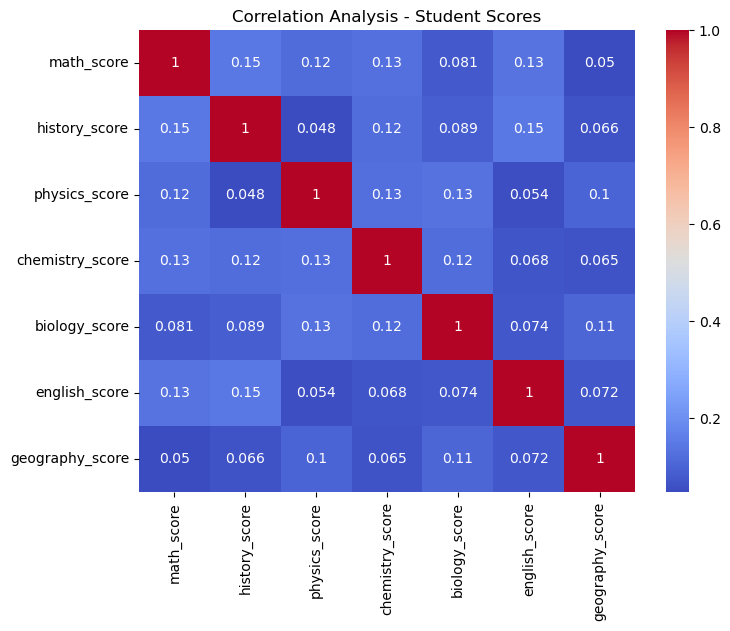

In [12]:
# 1. Correlation Analysis

print("Correlation Matrix")
print(df[score_cols].corr())

plt.figure(figsize=(8,6))
sns.heatmap(df[score_cols].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Analysis - Student Scores")
plt.show()


Gender-wise Mean Scores
        math_score  history_score  physics_score  chemistry_score  \
gender                                                              
female   82.792415      80.495010      80.678643        80.382236   
male     84.114228      80.168337      81.996994        79.606212   

        biology_score  english_score  geography_score  
gender                                                 
female      79.216567      81.740519        80.953094  
male        79.947896      80.812625        80.822645  


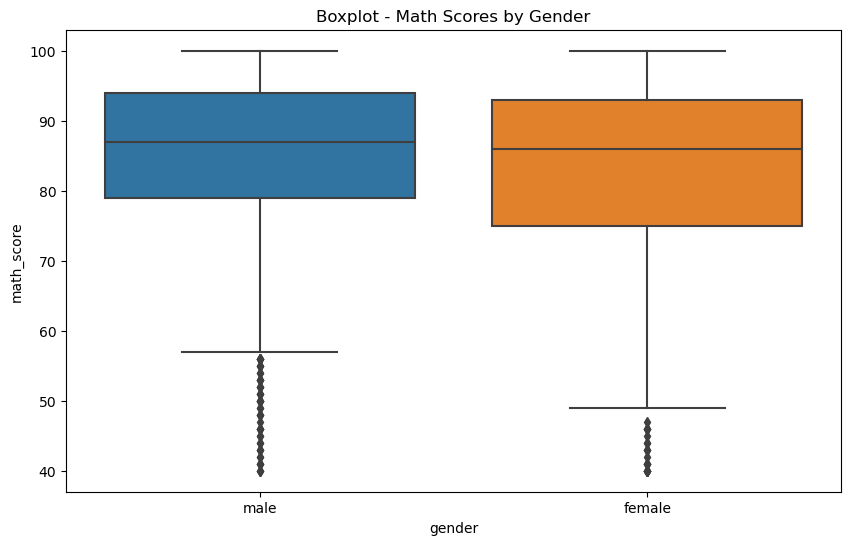

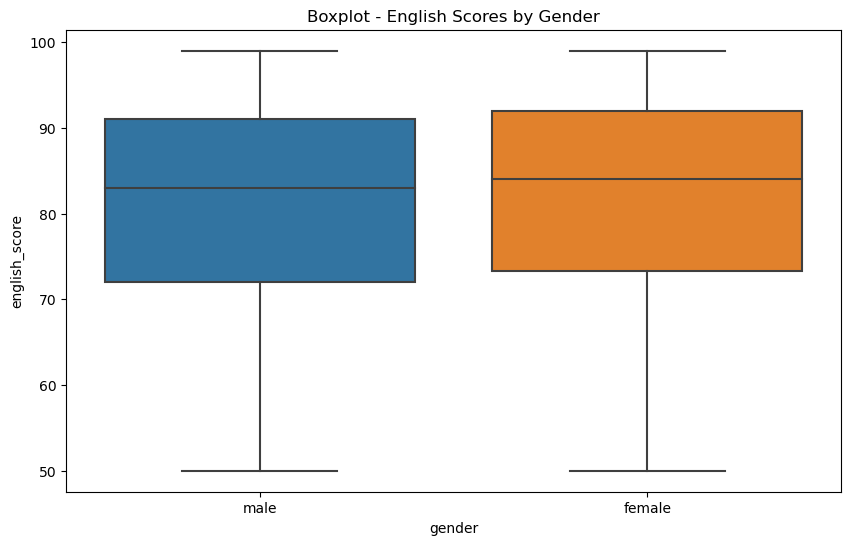

In [13]:
# 2. Group Comparison (Gender-wise means, boxplots)

print("Gender-wise Mean Scores")
print(df.groupby("gender")[score_cols].mean())

# Boxplot for comparison
plt.figure(figsize=(10,6))
sns.boxplot(x="gender", y="math_score", data=df)
plt.title("Boxplot - Math Scores by Gender")
plt.show()

plt.figure(figsize=(10,6))
sns.boxplot(x="gender", y="english_score", data=df)
plt.title("Boxplot - English Scores by Gender")
plt.show()

Regression Analysis (Math ~ English)
                            OLS Regression Results                            
Dep. Variable:             math_score   R-squared:                       0.018
Model:                            OLS   Adj. R-squared:                  0.018
Method:                 Least Squares   F-statistic:                     36.99
Date:                Fri, 22 Aug 2025   Prob (F-statistic):           1.42e-09
Time:                        10:01:58   Log-Likelihood:                -7983.2
No. Observations:                2000   AIC:                         1.597e+04
Df Residuals:                    1998   BIC:                         1.598e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const    

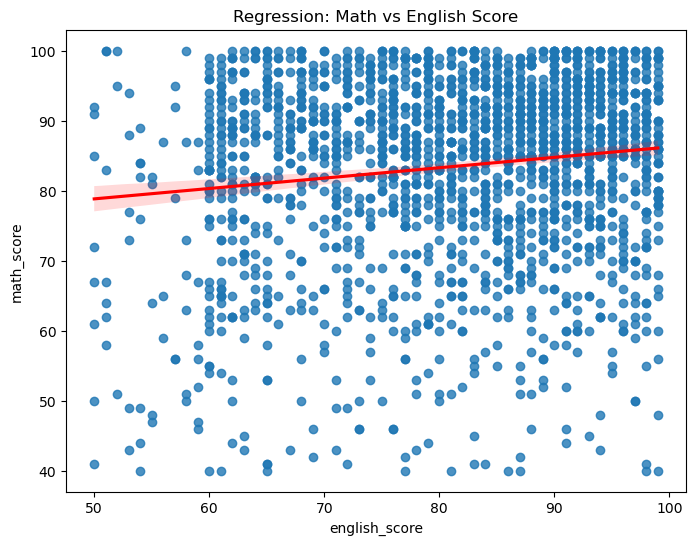

In [14]:
# 3. Regression Analysis

X = df["english_score"]
y = df["math_score"]

X_with_const = sm.add_constant(X)  # add intercept
model = sm.OLS(y, X_with_const).fit()
print("Regression Analysis (Math ~ English)")
print(model.summary())

# Regression line plot
plt.figure(figsize=(8,6))
sns.regplot(x="english_score", y="math_score", data=df, line_kws={"color":"red"})
plt.title("Regression: Math vs English Score")
plt.show()

Outlier Detection (Z-Score Method)
Number of outliers detected: 45
Sample Outliers:
       id first_name  last_name                                    email  \
29    30      Carol       Hill          carol.hill.30@gslingacademy.com   
49    50      Sonia      Noble         sonia.noble.50@gslingacademy.com   
90    91    Patrick     Parker      patrick.parker.91@gslingacademy.com   
114  115     Robert     Turner      robert.turner.115@gslingacademy.com   
151  152    Stephen  Rodriguez  stephen.rodriguez.152@gslingacademy.com   

     gender  part_time_job  absence_days  extracurricular_activities  \
29   female          False             3                       False   
49   female          False             0                       False   
90     male          False             0                       False   
114    male          False             6                        True   
151    male           True            10                       False   

     weekly_self_study_hours ca

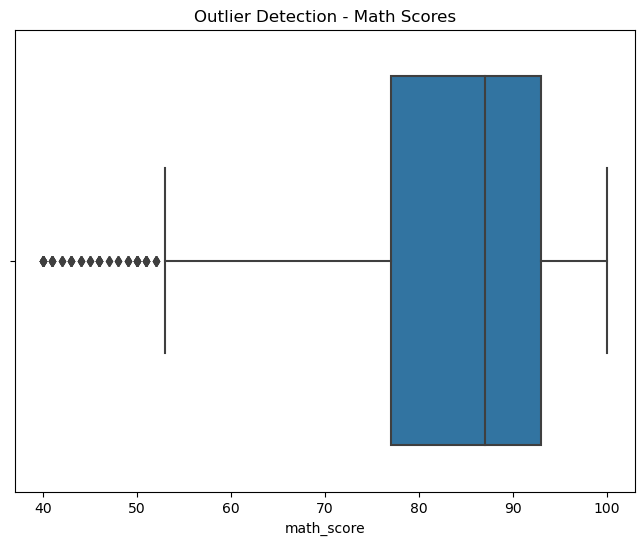

In [15]:
# 4. Outlier Detection

print("Outlier Detection (Z-Score Method)")
z_scores = stats.zscore(df[score_cols])
abs_z = abs(z_scores)
outliers = (abs_z > 3).any(axis=1)   # any subject score > 3 std dev
print("Number of outliers detected:", outliers.sum())
print("Sample Outliers:\n", df[outliers].head())

# Boxplot to visualize outliers in Math
plt.figure(figsize=(8,6))
sns.boxplot(x=df["math_score"])
plt.title("Outlier Detection - Math Scores")
plt.show()